In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import WeibullFitter,ExponentialFitter,LogNormalFitter,LogLogisticFitter
from lifelines import WeibullAFTFitter,LogNormalAFTFitter,LogLogisticAFTFitter

In [47]:
telco = pd.read_csv("telco.csv")

In [48]:
telco

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Zone 3,10,39,Unmarried,0,27,Some college,No,Female,No,No,No,Basic service,No
996,997,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,No,Female,No,No,No,Basic service,No
997,998,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,No,Female,Yes,Yes,Yes,Total service,No
998,999,Zone 3,70,49,Unmarried,18,87,High school degree,No,Female,Yes,No,Yes,Plus service,No


In [49]:
encode_columns = ['region','marital','ed','retire','gender','voice','internet','forward','custcat','churn']
telco1 = pd.get_dummies(telco,columns = encode_columns,prefix = encode_columns,drop_first = True)
telco_survival = telco1.drop(["ID", 'address'], axis = 1)
telco_survival

,tenure,age,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes
0,13,44,64,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,11,33,136,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1
2,68,52,116,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,33,33,33,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,23,30,30,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,27,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
996,7,34,22,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
997,67,59,944,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0
998,70,49,87,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0


In [50]:
lognormal = LogNormalAFTFitter()
lognormal.fit(telco_survival, duration_col = 'tenure', event_col = 'churn_Yes')
lognormal_pd = lognormal.predict_survival_function(telco_survival).transpose()
lognormalMean = lognormal_pd.mean().to_list()

In [51]:
weibull = WeibullAFTFitter()
weibull.fit(telco_survival, duration_col = 'tenure', event_col = 'churn_Yes')
weibull_pd = weibull.predict_survival_function(telco_survival).transpose()
weibullMean = weibull_pd.mean().to_list()

In [52]:
loglogistic = LogLogisticAFTFitter()
loglogistic.fit(telco_survival, duration_col = 'tenure', event_col = 'churn_Yes')
loglogistic_pd = loglogistic.predict_survival_function(telco_survival).transpose()
loglogisticMean = loglogistic_pd.mean().to_list() 

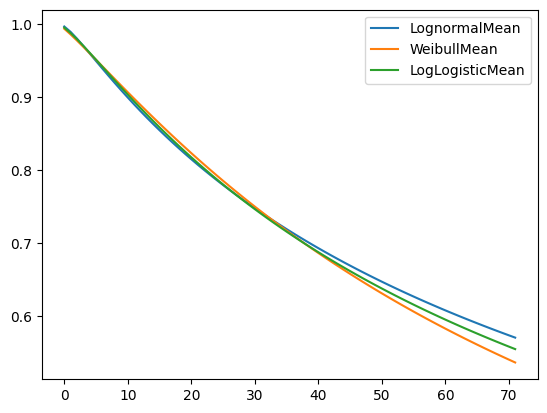

In [53]:
plt.plot(lognormalMean,  label = "LognormalMean")
plt.plot(WeibullMean,  label = "WeibullMean")
plt.plot(LogLogisticMean,label = 'LogLogisticMean')
plt.legend()
plt.show()

In [55]:
ln = LogNormalFitter()
wb = WeibullFitter()
ll = LogLogisticFitter()
exp = ExponentialFitter()

for model in [ln, wb, ll, exp]:
    model.fit(durations = telco_survival["tenure"], event_observed = telco_survival["churn_Yes"])
    print("The AIC value for", model.__class__.__name__, "is",  model.AIC_)

The AIC value for LogNormalFitter is 3209.0351474316735
The AIC value for WeibullFitter is 3216.8611706815464
The AIC value for LogLogisticFitter is 3214.4154757933375
The AIC value for ExponentialFitter is 3215.9608134637247


The results above show AIC values for each model. The smaller the AIC, the better model is performing.
LogNormalFitter model has the lowest AIC value, so continuing with it. 

Below are the parameters for LogNormal model

In [56]:
print(ln.params_)

mu_       4.772876
sigma_    1.805942
Name: coef, dtype: float64


In [57]:
print(lognormal.params_)

param   covariate                      
mu_     age                                0.053293
        custcat_E-service                  1.131188
        custcat_Plus service               0.954780
        custcat_Total service              1.288096
        ed_Did not complete high school    0.406960
        ed_High school degree              0.352093
        ed_Post-undergraduate degree      -0.012327
        ed_Some college                    0.288050
        forward_Yes                       -0.156253
        gender_Male                        0.038949
        income                             0.001527
        internet_Yes                      -0.820625
        marital_Unmarried                 -0.431497
        region_Zone 2                     -0.072505
        region_Zone 3                      0.053751
        retire_Yes                        -0.088076
        voice_Yes                         -0.501318
        Intercept                          1.932948
sigma_  Intercept       

Keeping significant features for final model

In [60]:
telco_survival_final = telco_survival[['age','churn_Yes','tenure','marital_Unmarried','internet_Yes', 'custcat_E-service', 'custcat_Plus service','custcat_Total service', 'ed_Did not complete high school', 'ed_High school degree', 'voice_Yes']]
telco_survival_final

,age,churn_Yes,tenure,marital_Unmarried,internet_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,ed_Did not complete high school,ed_High school degree,voice_Yes
0,44,1,13,0,0,0,0,0,0,0,0
1,33,1,11,0,0,0,0,1,0,0,1
2,52,0,68,0,0,0,1,0,1,0,0
3,33,1,33,1,0,0,0,0,0,1,0
4,30,0,23,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,39,0,10,1,0,0,0,0,0,0,0
996,34,0,7,1,0,0,0,0,0,0,0
997,59,0,67,1,1,0,0,1,0,0,1
998,49,0,70,1,0,0,1,0,0,1,1


In [62]:
lognormal = LogNormalAFTFitter()
lognormal.fit(telco_survival_final, duration_col='tenure', event_col='churn_Yes')
lognormal_pd = lognormal.predict_survival_function(telco_survival_final).transpose()
lognormal_pd

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999569,0.997620,0.994214,0.989655,0.984209,0.978085,0.971445,0.964414,0.957088,0.949544,...,0.613455,0.609021,0.604641,0.600315,0.596042,0.591821,0.587651,0.583531,0.579461,0.575440
1,0.999596,0.997749,0.994501,0.990135,0.984903,0.979003,0.972593,0.965791,0.958694,0.951374,...,0.620278,0.615866,0.611508,0.607202,0.602949,0.598747,0.594594,0.590491,0.586437,0.582430
2,0.999996,0.999963,0.999878,0.999727,0.999504,0.999208,0.998839,0.998398,0.997889,0.997312,...,0.923857,0.922187,0.920515,0.918843,0.917170,0.915496,0.913822,0.912148,0.910474,0.908801
3,0.996623,0.986078,0.971390,0.954513,0.936540,0.918102,0.899583,0.881215,0.863144,0.845460,...,0.368829,0.364474,0.360204,0.356015,0.351907,0.347876,0.343921,0.340039,0.336229,0.332489
4,0.999809,0.998827,0.996971,0.994350,0.991091,0.987306,0.983089,0.978520,0.973662,0.968569,...,0.694293,0.690225,0.686197,0.682208,0.678259,0.674348,0.670476,0.666641,0.662844,0.659083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.997560,0.989435,0.977667,0.963789,0.948716,0.933010,0.917027,0.900997,0.885071,0.869351,...,0.409518,0.405028,0.400619,0.396291,0.392039,0.387864,0.383762,0.379732,0.375771,0.371879
996,0.995406,0.981949,0.963905,0.943696,0.922582,0.901252,0.880097,0.859344,0.839121,0.819498,...,0.330454,0.326273,0.322177,0.318166,0.314235,0.310383,0.306607,0.302906,0.299277,0.295718
997,0.999781,0.998678,0.996621,0.993742,0.990184,0.986074,0.981516,0.976596,0.971382,0.965932,...,0.681534,0.677394,0.673297,0.669241,0.665227,0.661254,0.657321,0.653428,0.649575,0.645760
998,0.999871,0.999171,0.997798,0.995809,0.993289,0.990318,0.986966,0.983294,0.979353,0.975187,...,0.729418,0.725575,0.721766,0.717989,0.714246,0.710535,0.706856,0.703209,0.699594,0.696010


In [63]:
MM = 1300
sequence = range(1,len(lognormal_pd.columns)+1)
r = 0.1
for num in sequence:
    lognormal_pd.loc[:,num] = lognormal_pd.loc[:,num]/((1+r/12)**(sequence[num-1]-1))
lognormal_pd["CLV"] = MM * lognormal_pd.sum(axis = 1)
lognormal_pd

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0,CLV
0,0.999569,0.989375,0.977848,0.965320,0.952074,0.938331,0.924259,0.909986,0.895610,0.881207,...,0.361054,0.355495,0.350034,0.344671,0.339401,0.334225,0.329139,0.324142,0.319232,56078.114802
1,0.999596,0.989503,0.978131,0.965789,0.952745,0.939212,0.925351,0.911285,0.897112,0.882905,...,0.365112,0.359532,0.354051,0.348665,0.343373,0.338174,0.333065,0.328044,0.323110,56395.504479
2,0.999996,0.991699,0.983419,0.975144,0.966870,0.958595,0.950322,0.942052,0.933790,0.925537,...,0.546712,0.541211,0.535763,0.530368,0.525025,0.519734,0.514495,0.509306,0.504169,68468.063350
3,0.996623,0.977929,0.955400,0.931043,0.905961,0.880786,0.855887,0.831482,0.807701,0.784614,...,0.216076,0.211780,0.207587,0.203496,0.199502,0.195604,0.191798,0.188082,0.184452,43021.754114
4,0.999809,0.990572,0.980560,0.969900,0.958731,0.947177,0.935337,0.923296,0.911119,0.898863,...,0.409195,0.403445,0.397785,0.392214,0.386730,0.381331,0.376017,0.370785,0.365635,59703.814765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.997560,0.981258,0.961574,0.940090,0.917740,0.895088,0.872484,0.850148,0.828219,0.806785,...,0.240118,0.235542,0.231071,0.226703,0.222435,0.218264,0.214187,0.210201,0.206305,45457.276043
996,0.995406,0.973834,0.948039,0.920492,0.892459,0.864620,0.837348,0.810846,0.785221,0.760520,...,0.193429,0.189422,0.185518,0.181711,0.178001,0.174382,0.170853,0.167411,0.164054,40599.660759
997,0.999781,0.990425,0.980216,0.969307,0.957854,0.945995,0.933841,0.921480,0.908986,0.896416,...,0.401589,0.395861,0.390225,0.384678,0.379221,0.373850,0.368564,0.363363,0.358244,59150.740902
998,0.999871,0.990913,0.981373,0.971323,0.960858,0.950066,0.939025,0.927800,0.916445,0.905004,...,0.430152,0.424358,0.418649,0.413024,0.407483,0.402023,0.396643,0.391343,0.386120,61190.447515


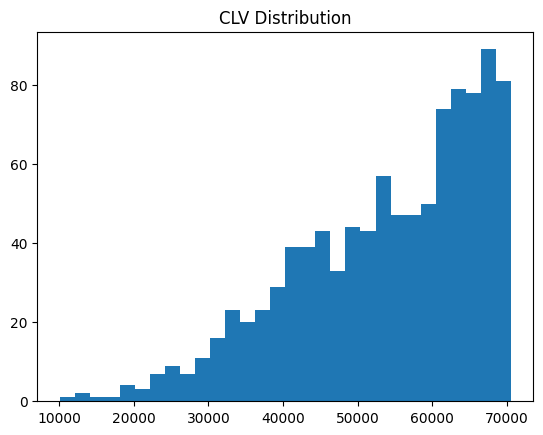

In [66]:
plt.hist(lognormal_pd.CLV, bins = 30)
plt.title("CLV Distribution")
plt.show()

In [67]:
lognormal_pd["CLV"].describe()

count     1000.000000
mean     53898.763869
std      12490.491982
min      10109.964247
25%      45166.845628
50%      56343.714242
75%      64449.221095
max      70516.485972
Name: CLV, dtype: float64